In [66]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
#  cdf is city data frame, rdf is ride data frame
cdf=pd.read_csv(city_data_to_load)
rdf=pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
# codf is combined data frame
codf=cdf.merge(rdf)

# Display the data table for preview
codf.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [67]:
codf.shape

(2375, 6)

In [68]:
codf.dtypes

city             object
driver_count      int64
type             object
date             object
fare            float64
ride_id           int64
dtype: object

## Bubble Plot of Ride Sharing Data

In [69]:
# Find total fare for all types
allFareSum=codf['fare'].sum()

# Find total ride count
allRides=codf['ride_id'].count()

# Find Total Drivers
allDrivers=len(codf['driver_count'])

In [70]:
# Grab Urban cities
urbLoc=codf.loc[codf['type'] == 'Urban']

# Count number of rides per city
urbRideCount=urbLoc.groupby(['type', 'city'])['fare'].count()

# Find average ride cost
urbRideAvg=urbLoc.groupby(['type', 'city'])['fare'].mean()

# Find diver count per city
urbDriverCount=urbLoc.groupby(['type', 'city'])['driver_count'].first()

# Find urban fare total
urbFareSum=urbLoc['fare'].sum()

# Find urban ride counts
urbRides=len(urbLoc)

In [71]:
# Grab Suburban cities
subLoc=codf.loc[codf['type'] == 'Suburban']

# Count number of rides per city
subRideCount=subLoc.groupby(['type', 'city'])['fare'].count()

# Find average ride cost
subRideAvg=subLoc.groupby(['type', 'city'])['fare'].mean()

# Find diver count per city
subDriverCount=subLoc.groupby(['type', 'city'])['driver_count'].first()

# Find suburban fare total
subFareSum=subLoc['fare'].sum()

# Find suburban ride counts
subRides=len(subLoc)

In [72]:
# Grab Rural cities
rurLoc=codf.loc[codf['type'] == 'Rural']

# Count number of rides per city
rurRideCount=rurLoc.groupby(['type', 'city'])['fare'].count()

# Find average ride cost
rurRideAvg=rurLoc.groupby(['type', 'city'])['fare'].mean()

# Find diver count per city
rurDriverCount=rurLoc.groupby(['type', 'city'])['driver_count'].first()

# Find rural fare total
rurFareSum=rurLoc['fare'].sum()

# Find rural ride counts
rurRides=len(rurLoc)

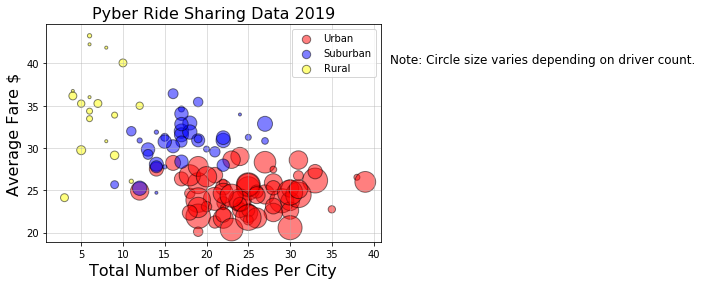

In [73]:
# Build the scatter plots for each city type
urbBub=plt.scatter(urbRideCount,urbRideAvg,s=urbDriverCount*9,marker='o',color='red',alpha=0.5,edgecolors='black')
subBub=plt.scatter(subRideCount,subRideAvg,s=subDriverCount*9,marker='o',color='blue',alpha=0.5,edgecolors='black')
rurBub=plt.scatter(rurRideCount,rurRideAvg,s=rurDriverCount*9,marker='o',color='yellow',alpha=0.5,edgecolors='black')

# Incorporate the other graph properties
plt.title('Pyber Ride Sharing Data 2019', fontsize=16)
plt.xlabel('Total Number of Rides Per City', fontsize=16)
plt.ylabel('Average Fare $', fontsize=16)
plt.grid(b=None, which='major', axis='both',alpha=0.5)

# Create a legend
leg=plt.legend((urbBub, subBub, rurBub),
           ('Urban', 'Suburban', 'Rural'),
           scatterpoints=1,
           loc='upper right',
           ncol=1,
           fontsize=10)

# Resize legend
leg.legendHandles[0]._sizes = [70]
leg.legendHandles[1]._sizes = [70]
leg.legendHandles[2]._sizes = [70]

# Incorporate a text label regarding circle size
plt.text(42,40,'Note: Circle size varies depending on driver count.',fontsize=12)

# Save Figure
plt.savefig('pyber_data_scatter.png')

## Total Fares by City Type

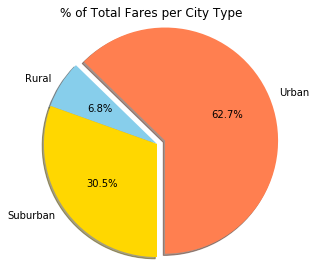

In [74]:
# Calculate Type Percents
# Find Urban percentage of total fare
uPerc=urbFareSum/allFareSum*100

# Find Suburban percentage of total fare
sPerc=subFareSum/allFareSum*100

# Find Rural percentage of total fare
rPerc=rurFareSum/allFareSum*100

# Combine percentage variables to one 
allPerc=uPerc,rPerc,sPerc
# Build Pie Chart
plt.pie(allPerc,
        colors=('coral','skyblue','gold'),
        explode=(0.1,-0,0),
        startangle=270,
        radius=1.3,
        autopct='%1.1f%%', shadow=True,
        labels=('Urban','Rural','Suburban'))
plt.suptitle('% of Total Fares per City Type')
# Save Figure
plt.savefig('city_fares_pie.png')

In [75]:
# Show Figure
plt.show()

## Total Rides by City Type

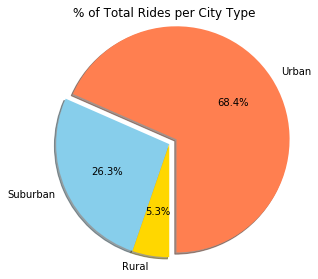

In [76]:
# Calculate Ride Percents
# # Find Urban percentage of total rides
uRides=urbRides/allRides*100

# Find Suburban percentage of total rides
sRides=subRides/allRides*100

# Find Rural percentage of total rides
rRides=rurRides/allRides*100

# Combine percentage variables to one 
allPRides=uRides,sRides,rRides
# Build Pie Chart
plt.pie(allPRides,
        colors=('coral','skyblue','gold'),
        explode=(0.1,-0,0),
        startangle=270,
        radius=1.3,
        autopct='%1.1f%%', shadow=True,
        labels=('Urban','Suburban','Rural'))
plt.suptitle('% of Total Rides per City Type')
# Save Figure
plt.savefig('city_rides_pie.png')

In [77]:
# Show Figure
plt.show()

## Total Drivers by City Type

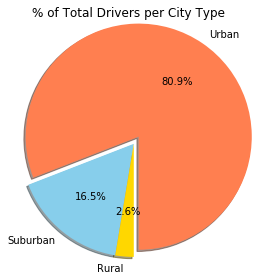

In [87]:
# Calculate Driver Percents
# Find total Urban drivers
urbDriverSum=urbDriverCount.sum()

# Find total Subrban drivers
subDriverSum=subDriverCount.sum()

# Find total Rural drivers
rurDriverSum=rurDriverCount.sum()

# Find Urban percentage of total drivers
uDrivers=urbDriverSum/allDrivers*100

# Find Suburban percentage of total drivers
sDrivers=subDriverSum/allDrivers*100

# Find Rural percentage of total drivers
rDrivers=rurDriverSum/allDrivers*100

# Combine percentage variables to one 
allPDrivers=uDrivers,sDrivers,rDrivers

# Build Pie Chart
plt.pie(allPDrivers,
        colors=('coral','skyblue','gold'),
        explode=(0.1,-0,0),
        startangle=270,
        radius=1.3,
        autopct='%1.1f%%', shadow=True,
        labels=('Urban','Suburban','Rural'))
plt.suptitle('% of Total Drivers per City Type')
# Save Figure
plt.savefig('city_drivers_pie.png')

In [ ]:
# Show Figure
plt.show()